In [1]:
import pandas as pd

In [2]:
ts = pd.Series.from_csv('data/coherence_timeseries.csv')

In [3]:
ts.head()

0.0   -0.902547
0.4   -0.356314
0.8    1.000000
1.2    0.866656
1.6   -0.351326
dtype: float64

Alternatively, we can read the CSV file into a data frame.

In [4]:
df = pd.read_csv('data/coherence_timeseries.csv', header=None)

In [5]:
df.columns = ['time', 'signal']

In [6]:
df.head()

,time,signal
0,0.0,-0.902547
1,0.4,-0.356314
2,0.8,1.000000
3,1.2,0.866656
4,1.6,-0.351326


In [7]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

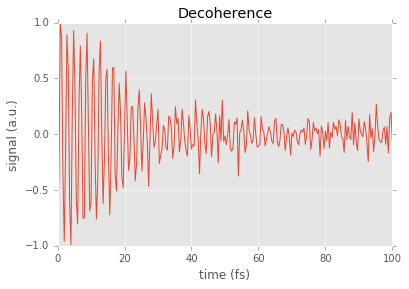

In [8]:
plt.plot(df['time'], df['signal'])
plt.xlabel('time (fs)')
plt.ylabel('signal (a.u.)')
plt.title('Decoherence')

At first glance, we can identify two different parts in this time series: before and after roughly $t = 20$ fs.
The signal looks pseudo-periodic before $20$ fs, and noisy after $20$ fs.

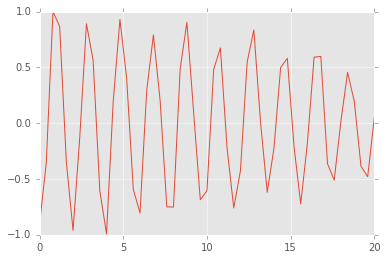

In [9]:
ts.loc[:20.0].plot()

There are about 10 pseudo-periods so one pseudo-period is $T \sim 2$ fs.
Note that angles are easier on the eye when no sharper than $70$ degrees.

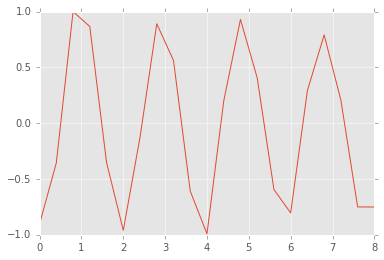

In [10]:
ts.loc[:8].plot()

What about a scatter plot?

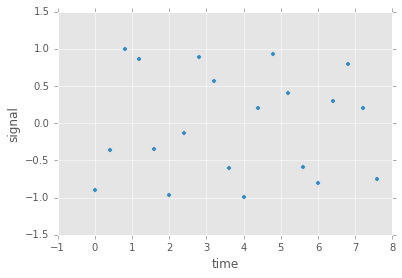

In [11]:
df[:20].plot(kind='scatter', x='time', y='signal')

Maybe add a 'fitting' sine (line) as a guide to the eye?

We may want to use an inset in order to visualize both time scales (pseudo-period $T$ in the main plot and decoherence duration $t$ in the inset).

[]

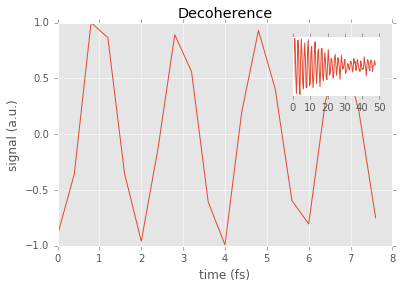

In [12]:
# Main axes
plt.plot(df['time'][:20], df['signal'][:20])
plt.xlabel('time (fs)')
plt.ylabel('signal (a.u.)')
plt.title('Decoherence')

# This is an inset axes over the main axes
inset = plt.axes([.67, .65, .2, .2], axisbg='w')
inset.plot(df['time'][:120], df['signal'][:120])
plt.setp(inset, yticks=[])

`plotly` offers a more intuitive syntax.

In [13]:
import plotly
plotly.__version__

'1.8.3'

In [14]:
import plotly.plotly as py
import plotly.graph_objs as pgo

In [15]:
periods_trace = pgo.Scatter(x=df['time'][:20], y=df['signal'][:20])
decoherence_trace = pgo.Scatter(x=df['time'][:120], y=df['signal'][:120], xaxis='x2', yaxis='y2')

data = pgo.Data([periods_trace, decoherence_trace])

layout = pgo.Layout(xaxis2=pgo.XAxis(domain=[0.6, 0.95], anchor='y2', zeroline=False),
                    yaxis2=pgo.YAxis(domain=[0.6, 0.95], anchor='x2', zeroline=False),
                    showlegend=False,
                    xaxis=pgo.XAxis(zeroline=False),
                    yaxis=pgo.YAxis(zeroline=False))

fig = pgo.Figure(data=data, layout=layout)

In [16]:
py.iplot(fig, filename = 'inset-two-timescales')

* Comparisons
* Small variations vs orders of magnitude
* Multivariate Analysis